In [53]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split

In [54]:
train=pd.read_excel("/Users/jatavathpavannaik/Documents/python/Machine Learning/Projects/ncrna_train.xlsx")
train=pd.DataFrame(train)
test=pd.read_excel("/Users/jatavathpavannaik/Documents/python/Machine Learning/Projects/ncrna_test.xlsx")
test=pd.DataFrame(test)

In [55]:
train["Label"].value_counts()

-1    1356
 1     644
Name: Label, dtype: int64

In [56]:
train.describe()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Label
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1999.000000,1967.000000,2000.00000
mean,0.826100,0.547768,0.312140,0.373952,0.639853,0.291446,0.342802,0.672366,-0.35600
std,0.071751,0.352140,0.131569,0.155522,0.146410,0.123472,0.144697,0.132335,0.93472
min,0.066336,0.022395,0.035533,0.029140,0.072238,0.027974,0.038358,0.086859,-1.00000
25%,0.790410,0.191855,0.242956,0.290002,0.560445,0.221307,0.268704,0.608479,-1.00000
50%,0.836236,0.826964,0.300114,0.365291,0.656022,0.283122,0.339688,0.677109,-1.00000
75%,0.869000,0.895573,0.362762,0.424783,0.738861,0.336356,0.393605,0.758051,1.00000
max,1.000000,1.000000,1.000000,1.000000,0.977298,1.000000,1.000000,1.000000,1.00000


In [57]:
train.corr()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Label
Feature1,1.000000,0.610883,-0.250514,-0.358944,0.282418,-0.359672,-0.326997,0.332108,0.446640
Feature2,0.610883,1.000000,0.089070,-0.218624,0.042899,-0.052136,-0.215330,0.149829,0.017341
Feature3,-0.250514,0.089070,1.000000,0.324073,-0.638968,0.062578,0.018015,-0.011058,0.031026
Feature4,-0.358944,-0.218624,0.324073,1.000000,-0.782659,0.058751,0.110013,-0.058748,-0.009048
Feature5,0.282418,0.042899,-0.638968,-0.782659,1.000000,-0.036304,-0.078138,0.031189,-0.014215
Feature6,-0.359672,-0.052136,0.062578,0.058751,-0.036304,1.000000,0.432743,-0.693976,-0.007980
Feature7,-0.326997,-0.215330,0.018015,0.110013,-0.078138,0.432743,1.000000,-0.867786,0.001117
Feature8,0.332108,0.149829,-0.011058,-0.058748,0.031189,-0.693976,-0.867786,1.000000,-0.008280
Label,0.446640,0.017341,0.031026,-0.009048,-0.014215,-0.007980,0.001117,-0.008280,1.000000


In [58]:
train.isna().sum()

Feature1     0
Feature2     0
Feature3     0
Feature4     0
Feature5     0
Feature6     0
Feature7     1
Feature8    33
Label        0
dtype: int64

In [59]:
train["Feature7"].fillna(np.mean(train["Feature7"]),inplace=True)
train["Feature8"].fillna(np.mean(train["Feature8"]),inplace=True)


In [60]:
train.isna().sum()

Feature1    0
Feature2    0
Feature3    0
Feature4    0
Feature5    0
Feature6    0
Feature7    0
Feature8    0
Label       0
dtype: int64

In [61]:
X = train.drop('Label', axis=1)  # Features
y = train['Label']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [62]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are your training and testing data

# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_pred = logistic_reg.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
print("Logistic Regression Accuracy:", logistic_accuracy)

# # XGBoost
# xgb = XGBClassifier()
# xgb.fit(X_train, y_train)
# xgb_pred = xgb.predict(X_test)
# xgb_accuracy = accuracy_score(y_test, xgb_pred)
# print("XGBoost Accuracy:", xgb_accuracy)

# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
naive_bayes_pred = naive_bayes.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)
print("Naive Bayes Accuracy:", naive_bayes_accuracy)

SVM_Cla = SVC()
SVM_Cla.fit(X_train, y_train)
SVM_pred = SVM_Cla.predict(X_test)
SVM_accuracy = accuracy_score(y_test, SVM_pred)
print("Support Vector Machine Accuracy::", SVM_accuracy)

Logistic Regression Accuracy: 0.7475
Naive Bayes Accuracy: 0.745
Support Vector Machine Accuracy:: 0.9375


In [63]:
param_grid_svm = {'C': [0.1, 1, 10, 100,1000,0.001,0.0001],
                  'gamma': [0.01, 0.1, 1, 10, 100,1000,0.001,0.0001]}
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)
best_params_svm = grid_search_svm.best_params_

In [64]:
best_params_svm

{'C': 100, 'gamma': 1}

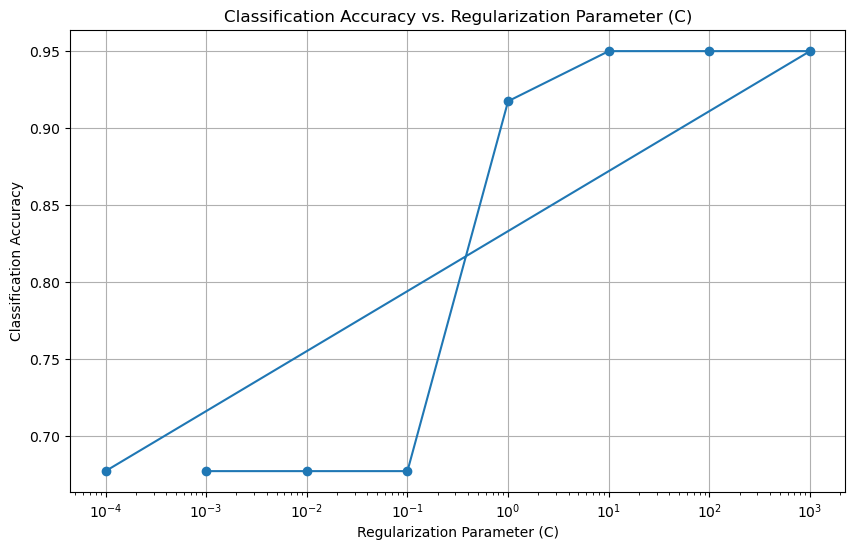

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

accuracy_list = []
C_values = [0.001, 0.01, 0.1, 1, 10, 100,1000,0.0001]


for C in C_values:
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X_train, y_train)
    
    y_pred_valid = svm_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred_valid)
    accuracy_list.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracy_list, marker='o')
plt.xscale('log')
plt.title('Classification Accuracy vs. Regularization Parameter (C)')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Classification Accuracy')
plt.grid(True)
plt.show()


In [66]:
train=train.sample(int(train.shape[0]/2))

In [67]:
X=train.iloc[:,:-1]
y=train.iloc[:,-1]

In [68]:
C_values = [0.1, 1, 10,100,1000,0.001,0.0001]
sigma_values = [0.1, 1, 10,100,1000,0.001,0.0001]

cv_results = np.zeros((len(C_values), len(sigma_values)))

for i, C in enumerate(C_values):
    for j, sigma in enumerate(sigma_values):
        svm = SVC(kernel='rbf', C=C, gamma=1/(2*sigma**2))
        
        scores = cross_val_score(svm, X, y, cv=5)
        
        cv_results[i, j] = np.mean(scores)

print("Cross Validation Results:")
print(cv_results)

Cross Validation Results:
[[0.673 0.671 0.671 0.671 0.671 0.671 0.671]
 [0.813 0.675 0.671 0.671 0.671 0.671 0.671]
 [0.84  0.95  0.671 0.671 0.671 0.671 0.671]
 [0.839 0.944 0.707 0.671 0.671 0.671 0.671]
 [0.841 0.938 0.94  0.671 0.671 0.671 0.671]
 [0.671 0.671 0.671 0.671 0.671 0.671 0.671]
 [0.671 0.671 0.671 0.671 0.671 0.671 0.671]]


In [69]:
model= SVC(kernel='rbf',C=1000,gamma=1/(2*10**2))
model.fit(X,y)

SVC(C=1000, gamma=0.005)

In [70]:
scores = cross_val_score(model, X, y, cv=5)

In [71]:
np.average(scores)

0.9400000000000001

In [72]:
test["Feature7"].fillna(np.mean(test["Feature7"]),inplace=True)
test["Feature8"].fillna(np.mean(test["Feature8"]),inplace=True)

In [73]:
a=model.predict(test)

In [74]:
b=SVM_Cla.predict(test)

In [75]:
accuracy_svm = accuracy_score(a, b)
print("Matching Percentage : ", accuracy_svm)

Matching Percentage :  0.972027972027972
